In [ ]:
#T1(a)1、2

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from itertools import combinations

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data"
column_names = [f'feature_{i}' for i in range(127)]  # the data don't support the column name
df = pd.read_csv(url, names=column_names, na_values='?', skiprows=1)

In [3]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126
53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
6,NaN,NaN,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,0.25,...,0.01,0.58,0.10,NaN,NaN,NaN,NaN,0.00,NaN,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


In [13]:
print(df.dtypes)#check  each  feature's  type

feature_0      float64
feature_1      float64
feature_2       object
feature_3        int64
feature_4      float64
                ...   
feature_122    float64
feature_123    float64
feature_124    float64
feature_125    float64
feature_126    float64
Length: 127, dtype: object


In [23]:
(df.dtypes).value_counts()#how  many  types  do  we  have

float64    125
object       1
int64        1
dtype: int64

In [24]:
df.select_dtypes(include=['object']).columns#only  feature_2  is  object

Index(['feature_2'], dtype='object')

In [4]:
df.info

<bound method DataFrame.info of     feature_0  feature_1            feature_2  feature_3  feature_4  \
53        NaN        NaN          Tukwilacity          1       0.00   
24        NaN        NaN         Aberdeentown          1       0.00   
34        5.0    81440.0  Willingborotownship          1       0.04   
42       95.0     6096.0    Bethlehemtownship          1       0.01   
6         NaN        NaN    SouthPasadenacity          1       0.02   
..        ...        ...                  ...        ...        ...   
12        NaN        NaN    TempleTerracecity         10       0.01   
6         NaN        NaN          Seasidecity         10       0.05   
9         9.0    80070.0        Waterburytown         10       0.16   
25       17.0    72600.0          Walthamcity         10       0.08   
6         NaN        NaN          Ontariocity         10       0.20   

    feature_5  feature_6  feature_7  feature_8  feature_9  ...  feature_117  \
53       0.16       0.12       0.74 

In [26]:
df.isnull().sum()#the  number  of  Nan

feature_0      1173
feature_1      1176
feature_2         0
feature_3         0
feature_4         0
               ... 
feature_122    1675
feature_123    1675
feature_124       0
feature_125    1675
feature_126       0
Length: 127, dtype: int64

In [54]:
#From  the  'Additional Variable Information'(in  the  website)
"""
 -- Feature_0  state: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal) 
  --Feature_1  county: numeric code for county - not predictive, and many missing values (numeric)
  --Feature_2  community: numeric code for community - not predictive and many missing values (numeric)
  --Feature_3  communityname: community name - not predictive - for information only (string)
  --Feature_4  fold: fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric)
"""
# we  use  KNN  to  get  the  value  to  replace  the  Nan  value
from sklearn.impute import KNNImputer
import pandas as pd


features_to_impute_knn = ['feature_0', 'feature_1', 'feature_3', 'feature_4']

imputer = KNNImputer(n_neighbors=5)

df[features_to_impute_knn] = imputer.fit_transform(df[features_to_impute]).round(0).astype(int)


df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126
53,65,44629,Tukwilacity,1,0,0.16,0.12,0.74,0.45,0.07,...,0.02,0.12,0.45,0.163428,0.076824,0.697956,0.440252,0.00,0.195252,0.67
24,65,44629,Aberdeentown,1,0,0.42,0.49,0.56,0.17,0.04,...,0.01,0.21,0.02,0.163428,0.076824,0.697956,0.440252,0.00,0.195252,0.43
34,5,81440,Willingborotownship,1,0,0.77,1.00,0.08,0.12,0.10,...,0.02,0.39,0.28,0.163428,0.076824,0.697956,0.440252,0.00,0.195252,0.12
42,95,6096,Bethlehemtownship,1,0,0.55,0.02,0.95,0.09,0.05,...,0.04,0.09,0.02,0.163428,0.076824,0.697956,0.440252,0.00,0.195252,0.03
6,13,56386,SouthPasadenacity,1,0,0.28,0.06,0.54,1.00,0.25,...,0.01,0.58,0.10,0.163428,0.076824,0.697956,0.440252,0.00,0.195252,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,27,52335,TempleTerracecity,10,0,0.40,0.10,0.87,0.12,0.16,...,0.01,0.28,0.05,0.163428,0.076824,0.697956,0.440252,0.00,0.195252,0.09
6,156,48266,Seasidecity,10,0,0.96,0.46,0.28,0.83,0.32,...,0.02,0.37,0.20,0.163428,0.076824,0.697956,0.440252,0.00,0.195252,0.45
9,9,80070,Waterburytown,10,0,0.37,0.25,0.69,0.04,0.25,...,0.08,0.32,0.18,0.080000,0.060000,0.780000,0.000000,0.91,0.280000,0.23
25,17,72600,Walthamcity,10,0,0.51,0.06,0.87,0.22,0.10,...,0.03,0.38,0.33,0.020000,0.020000,0.790000,0.000000,0.22,0.180000,0.19


In [55]:


features_to_impute_mean = [col for col in df.columns if col not in features_to_impute_knn]
df[features_to_impute_mean] = df[features_to_impute_mean].fillna(df[features_to_impute_mean].mean())
#for  other  features  we  use  its  average  to  replace  its  Nan  value
print(df.isnull().sum().sum())#check  how  many  value  do  we have  now

C:\Users\十凉\AppData\Local\Temp\ipykernel_53244\698510079.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[features_to_impute_mean] = df[features_to_impute_mean].fillna(df[features_to_impute_mean].mean())


0


In [56]:
#we  want  to  analyse  the  relationship  between  features  and  ViolentCrimesPerPop(feature_126)

#if  you  are  interested  in  every  feature's  name  (https://archive.ics.uci.edu/dataset/183/communities+and+crime),  which  I  have  sent  in  our  message  group
y = df['feature_126'].values
X = df.drop(columns=['feature_126','feature_2']).values#drop  feature_126  and  feature_2(char)
X

array([[6.50000000e+01, 4.46290000e+04, 1.00000000e+00, ...,
        4.40251572e-01, 0.00000000e+00, 1.95251572e-01],
       [6.50000000e+01, 4.46290000e+04, 1.00000000e+00, ...,
        4.40251572e-01, 0.00000000e+00, 1.95251572e-01],
       [5.00000000e+00, 8.14400000e+04, 1.00000000e+00, ...,
        4.40251572e-01, 0.00000000e+00, 1.95251572e-01],
       ...,
       [9.00000000e+00, 8.00700000e+04, 1.00000000e+01, ...,
        0.00000000e+00, 9.10000000e-01, 2.80000000e-01],
       [1.70000000e+01, 7.26000000e+04, 1.00000000e+01, ...,
        0.00000000e+00, 2.20000000e-01, 1.80000000e-01],
       [3.40000000e+01, 5.86730000e+04, 1.00000000e+01, ...,
        5.00000000e-01, 1.00000000e+00, 1.30000000e-01]])

In [57]:
#we  have  too  many  features,  we  just  curious  about  the  features  have  the  strongest  relationship  features  


"""
the  below  methods  you  don't  need  to  know,  I  can  write  this  part  in  our  essay.  You  can  know  that  I  
use  some  methods  to  select  the  most  significant  features.
"""

"\nthe  below  methods  you  don't  need  to  know,  I  can  write  this  part  in  our  essay.  You  can  know  that  I  \nuse  some  methods  to  select  the  most  significant  features.\n"

In [58]:
scaler = StandardScaler()#creat the normalization
X_scaled = scaler.fit_transform(X)#normalize the X
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [59]:
X_train_const = sm.add_constant(X_train)  # add a constant, science statsmental's  OLS don't have the intercept
model = sm.OLS(y_train, X_train_const).fit()
p_values = model.pvalues[1:]  # delete the p-value of intercept
important_features_ols = np.argsort(p_values)[:10]  # select the most significant 10 features
print("OLS significant feature:", important_features_ols)


OLS significant feature: [ 0 31 71 42 69 77 14 24 51 78]


In [60]:
from math import comb

n_features = X_train.shape[1]
max_features = 3  # you can adjust this value

total_combinations = sum(comb(n_features, k) for k in range(1, max_features + 1))
print(f"⚠️ we need to calculate {total_combinations} set of model")

# 如果组合数超过 100万，建议降低 max_features
if total_combinations > 1e6:
    print("🚨 too complex，recomment decrease max_features（recommend ≤3）")


⚠️ we need to calculate 325625 set of model


In [61]:
from itertools import combinations
import numpy as np
import statsmodels.api as sm
from tqdm import tqdm
from math import comb

def find_max_features(n_features, max_limit=1e6):
    """ 自动计算合理的 max_features，确保组合数量不超过 max_limit """
    for max_f in range(1, n_features + 1):
        total_combinations = sum(comb(n_features, k) for k in range(1, max_f + 1))
        if total_combinations > max_limit:
            return max_f - 1  # 返回不会超过 max_limit 的最大值
    return n_features

def best_subset(X, y, max_features=None, early_stop=0.99):
    """
    运行 Best Subset Selection，自动优化 max_features，加入提前终止机制
    :param X: 训练数据 (numpy array)
    :param y: 目标变量 (numpy array)
    :param max_features: 最大特征数，默认自动选择
    :param early_stop: 早停阈值，R²_adj 超过该值时提前终止
    :return: 选择的最佳特征索引
    """
    n_features = X.shape[1]

    # 自动选择 max_features
    if max_features is None:
        max_features = find_max_features(n_features)
        print(f"⚙️ 自动调整 max_features = {max_features}")

    print(f"🔍 计算 Best Subset (最多选 {max_features} 个特征，特征总数 {n_features})...")

    best_score = -np.inf
    best_subset = None

    # 遍历所有子集
    for k in tqdm(range(1, max_features + 1), desc="Searching Best Subset"):
        for subset in combinations(range(n_features), k):
            X_subset = X[:, subset]
            model = sm.OLS(y, sm.add_constant(X_subset)).fit()

            # select the largest R²_adj 
            if model.rsquared_adj > best_score:
                best_score = model.rsquared_adj
                best_subset = subset

            # **early stop**：if R²_adj larger than early_stop，stop early
            if best_score > early_stop:
                print(f"✅ find the model good enough (R²_adj = {best_score:.4f})，stop early")
                return best_subset

    print(f"✅ Best Subset success！（the best feature number : {len(best_subset)}，R²_adj: {best_score:.4f}）")
    return best_subset

# run Best Subset Selection
best_features_subset = best_subset(X_train, y_train, max_features=3, early_stop=0.999)
print("Best Subset 重要特征索引:", best_features_subset)

# if X_train is DataFrame，output the feature name
if isinstance(X_train, pd.DataFrame):
    selected_feature_names = X_train.columns[list(best_features_subset)]
    print("the feature we selected:", selected_feature_names)


🔍 计算 Best Subset (最多选 3 个特征，特征总数 125)...


Searching Best Subset: 100%|█████████████████████████████████████████████████████████████| 3/3 [03:49<00:00, 76.46s/it]

✅ Best Subset success！（the best feature number : 3，R²_adj: 0.6312）
Best Subset 重要特征索引: (6, 47, 74)


In [62]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

def stepwise_selection(X, y, threshold_in=0.05, threshold_out=0.1):
    included = []
    #X:feature matrix
    #threshold_in: if p less than 0.05(significant), add in our model
    #threshold_out:if p greater than 0.1(the feature already in our model), delete it
    while True:
        changed = False
        excluded = list(set(range(X.shape[1])) - set(included))
        new_pvals = pd.Series(dtype=float, index=excluded)  # avoid NaN

        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(X[:, included + [new_column]])).fit()
            new_pvals[new_column] = model.pvalues[-1]  # get the last p-value

        best_pval = new_pvals.min()
        
        if best_pval < threshold_in:
            best_feature = new_pvals.idxmin()
            included.append(best_feature)
            changed = True

        if included:
            model = sm.OLS(y, sm.add_constant(X[:, included])).fit()
            pvals = model.pvalues[1:]  # 直接用 NumPy 数组切片
            worst_pval = pvals.max()
            if worst_pval > threshold_out:
                worst_feature = pvals.argmax()  # 使用 `argmax()` 找最大索引
                included.remove(included[worst_feature])
                changed = True

        if not changed:
            break

    return included

# 运行 Stepwise Selection
best_features_stepwise = stepwise_selection(X_train, y_train)
print("Step-wise Selection the most significant 10 features:", best_features_stepwise)


Step-wise Selection the most significant 10 features: [47, 74, 0, 93, 14, 13, 51, 41, 53, 71, 5, 31, 91, 77, 89, 21, 16, 44, 18, 28, 34, 111, 90]


In [63]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
important_features_lasso = np.where(lasso.coef_ != 0)[0]

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
important_features_elastic = np.where(elastic_net.coef_ != 0)[0]

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

print("Lasso the most significant features:", important_features_lasso)
print("Elastic Net the most significant features:", important_features_elastic)


Lasso the most significant features: [ 6 47 53]
Elastic Net the most significant features: [ 6 46 47 53 74]


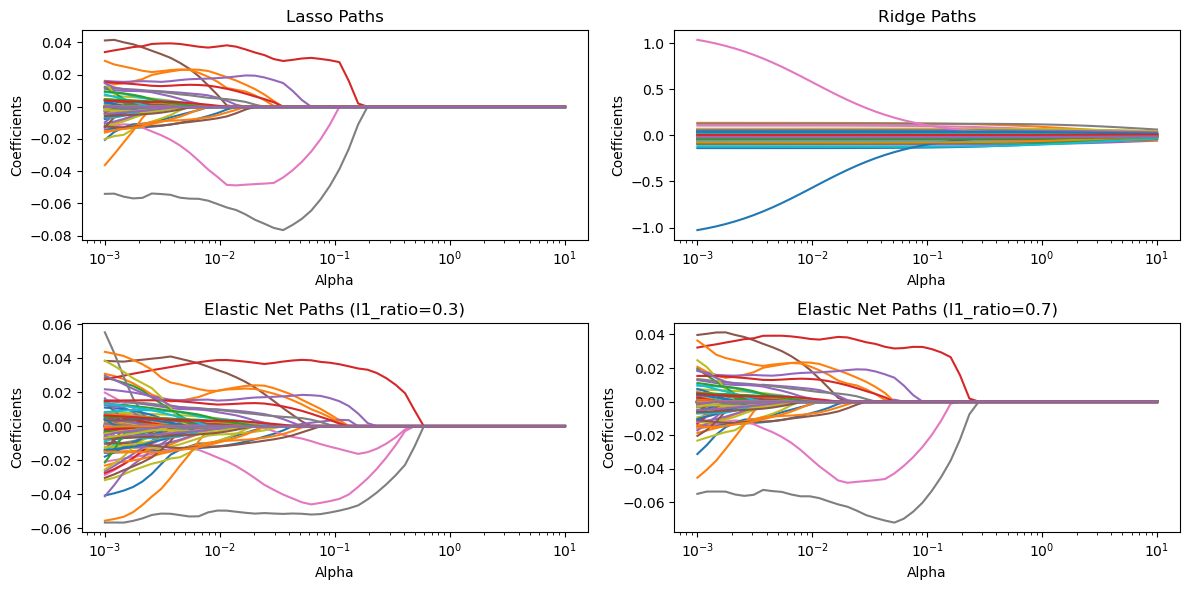

In [64]:
alphas = np.logspace(-3, 1, 50)

lasso_coefs = []
ridge_coefs = []
elastic_coefs_1 = []  # Elastic Net for l1_ratio = 0.3
elastic_coefs_2 = []  # Elastic Net for l1_ratio = 0.7

for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    elastic_net_1 = ElasticNet(alpha=alpha, l1_ratio=0.3).fit(X_train, y_train)
    elastic_net_2 = ElasticNet(alpha=alpha, l1_ratio=0.7).fit(X_train, y_train)

    lasso_coefs.append(lasso.coef_)
    ridge_coefs.append(ridge.coef_)
    elastic_coefs_1.append(elastic_net_1.coef_)
    elastic_coefs_2.append(elastic_net_2.coef_)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(alphas, np.array(lasso_coefs))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Paths')

plt.subplot(2, 2, 2)
plt.plot(alphas, np.array(ridge_coefs))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Paths')

plt.subplot(2, 2, 3)
plt.plot(alphas, np.array(elastic_coefs_1))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Elastic Net Paths (l1_ratio=0.3)')

plt.subplot(2, 2, 4)
plt.plot(alphas, np.array(elastic_coefs_2))
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Elastic Net Paths (l1_ratio=0.7)')

plt.tight_layout()
plt.show()


In [65]:
all_selected_features = {
    "OLS": set(important_features_ols),
    "Best Subset": set(best_features_subset),
    "Step-wise": set(best_features_stepwise),
    "Lasso": set(important_features_lasso),
    "Elastic Net": set(important_features_elastic),
}

# 计算每个特征被选中的次数
feature_counts = {}
for method, features in all_selected_features.items():
    for feature in features:
        feature_counts[feature] = feature_counts.get(feature, 0) + 1

# 排序输出最常被选中的特征
sorted_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)
print("最重要的特征（按被选次数排序）:", sorted_features)


最重要的特征（按被选次数排序）: [(47, 4), (74, 3), (6, 3), (53, 3), (0, 2), (71, 2), (77, 2), (14, 2), (51, 2), (31, 2), (69, 1), (42, 1), (78, 1), (24, 1), (5, 1), (13, 1), (16, 1), (18, 1), (21, 1), (28, 1), (34, 1), (41, 1), (44, 1), (89, 1), (90, 1), (91, 1), (93, 1), (111, 1), (46, 1)]


In [66]:

import pandas as pd

important_features = {
    47: "PersPerFam",
    74: "PctHousLess3BR",
    6: "householdsize",
    53: "NumIlleg",
    0: "state",
    71: "PersPerRentOccHous",
    77: "PctHousOwnOcc",
    51: "PctWorkMomYoungKids",
    91: "MedRentPctHousInc",
    31: "NumUnderPov"
}

feature_indices = list(important_features.keys())

df_selected = df.iloc[:, feature_indices]

df_selected.columns = [important_features[idx] for idx in feature_indices]

output_file = "selected_features_with_names.csv"
df_selected.to_csv(output_file, index=False)

print(f"✅{output_file}")


✅selected_features_with_names.csv


In [2]:
import pandas as pd

# Load the dataset
file_path = "selected_features_with_names.csv"
df = pd.read_csv(file_path)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Check for missing values (NaN)
missing_values = df.isnull().sum()

# Identify outliers using Z-score method (assuming numerical data)
from scipy.stats import zscore

numerical_cols = df.select_dtypes(include=['number']).columns
z_scores = df[numerical_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()

# Display results
duplicate_rows_count = duplicate_rows.shape[0]
missing_values_summary = missing_values[missing_values > 0]
outliers_summary = outliers[outliers > 0]

# Show results
results = {
    "Duplicate Rows": duplicate_rows_count,
    "Missing Values": missing_values_summary.to_dict(),
    "Outliers": outliers_summary.to_dict()
}

results


{'Duplicate Rows': 0,
 'Missing Values': {},
 'Outliers': {'PersPerFam': 14,
  'householdsize': 65,
  'NumIlleg': 45,
  'state': 37,
  'NumUnderPov': 50}}

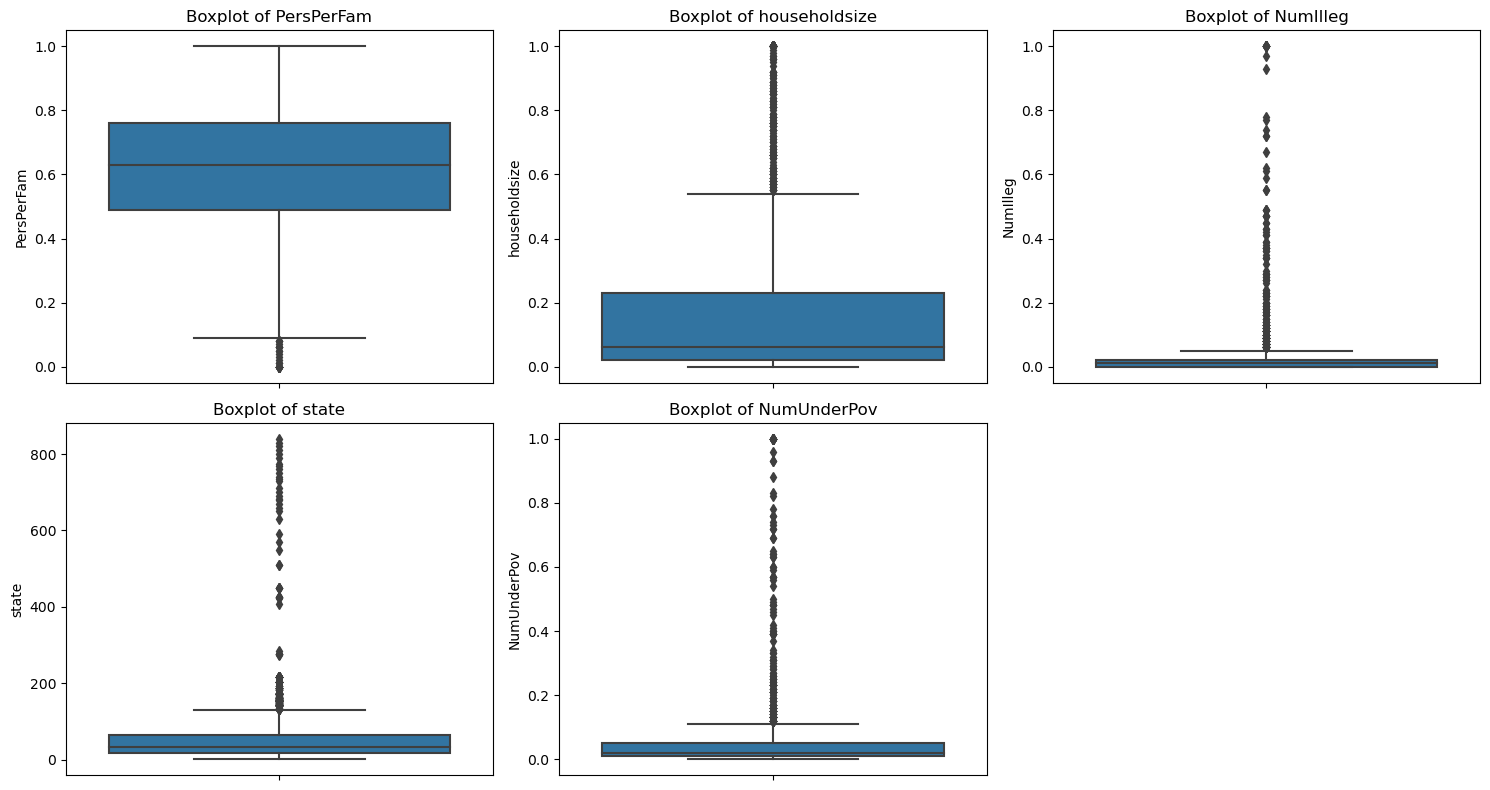

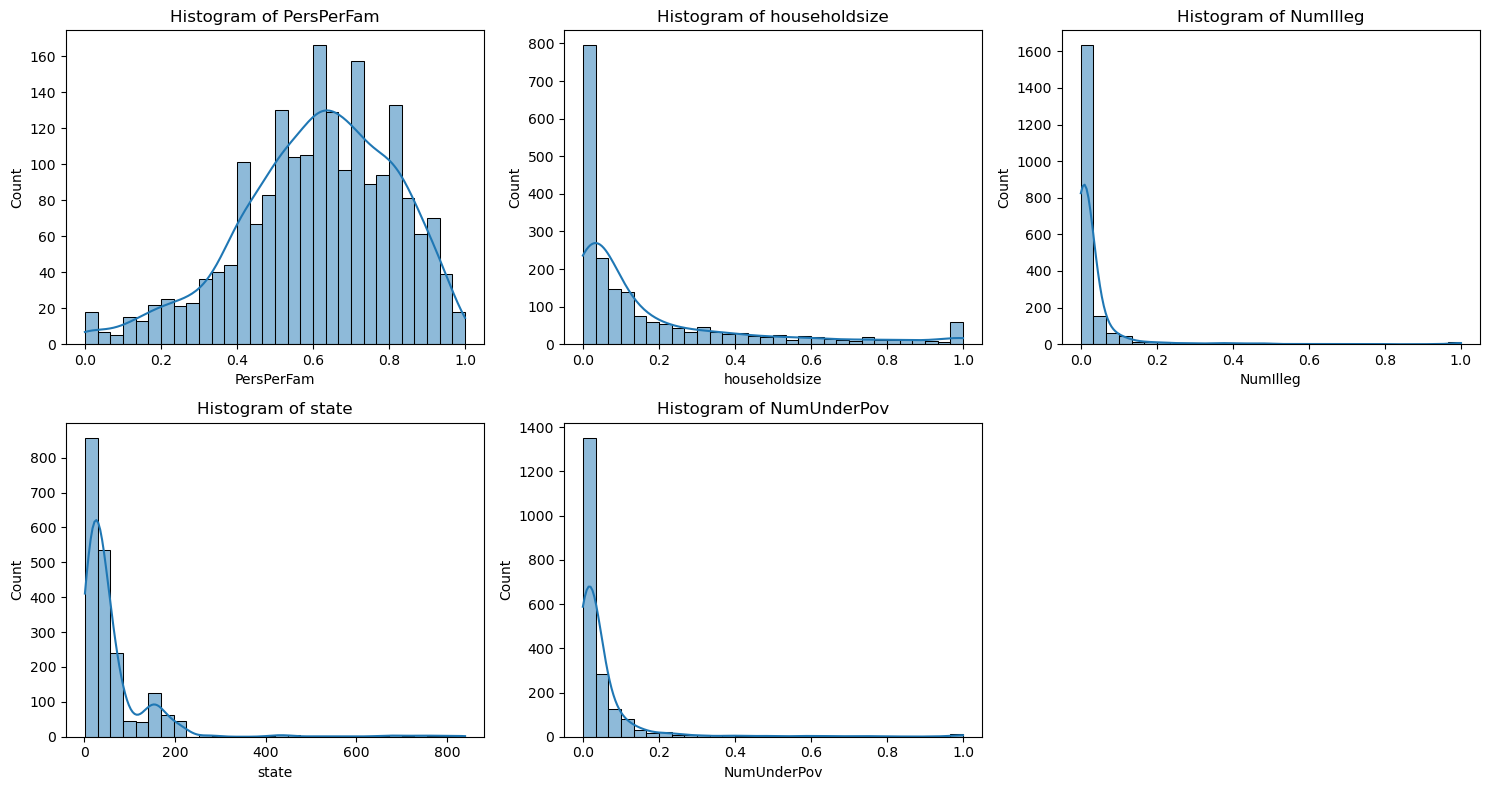

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplots for each column with detected outliers
for i, col in enumerate(["PersPerFam", "householdsize", "NumIlleg", "state", "NumUnderPov"], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Create histograms to show distribution of these columns
plt.figure(figsize=(15, 8))

for i, col in enumerate(["PersPerFam", "householdsize", "NumIlleg", "state", "NumUnderPov"], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


In [6]:
import numpy as np
import pandas as pd
from scipy.stats import mstats



# --- 1. Winsorization for 'PersPerFam' ---
# Replacing extreme values with the 5th and 95th percentile values
df["PersPerFam"] = mstats.winsorize(df["PersPerFam"], limits=[0.05, 0.05])

# --- 2. Log Transformation & Winsorization for 'householdsize' ---
df["householdsize"] = np.log1p(df["householdsize"])  # log(x+1) transformation
df["householdsize"] = mstats.winsorize(df["householdsize"], limits=[0.05, 0.05])

# --- 3. Log Transformation & Winsorization for 'NumIlleg' ---
df["NumIlleg"] = np.log1p(df["NumIlleg"])  # log(x+1) transformation
df["NumIlleg"] = mstats.winsorize(df["NumIlleg"], limits=[0.05, 0.05])

# --- 4. Handling 'state' (Categorical or Erroneous Values) ---
# Checking unique values to determine if it is categorical
unique_states = df["state"].unique()
if max(unique_states) > 100:  # Assuming state codes should be within a reasonable range
    df = df[df["state"] <= 100]  # Removing out-of-range state codes

# --- 5. Log Transformation & Winsorization for 'NumUnderPov' ---
df["NumUnderPov"] = np.log1p(df["NumUnderPov"])  # log(x+1) transformation
df["NumUnderPov"] = mstats.winsorize(df["NumUnderPov"], limits=[0.05, 0.05])

# Save the cleaned dataset
df.to_csv("cleaned_selected_features.csv", index=False)

print("Outlier handling completed. Cleaned dataset saved as 'cleaned_selected_features.csv'.")


Outlier handling completed. Cleaned dataset saved as 'cleaned_selected_features.csv'.


In [7]:
# Load the dataset
file_path = "cleaned_selected_features.csv"
df = pd.read_csv(file_path)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Check for missing values (NaN)
missing_values = df.isnull().sum()

# Identify outliers using Z-score method (assuming numerical data)
from scipy.stats import zscore

numerical_cols = df.select_dtypes(include=['number']).columns
z_scores = df[numerical_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()

# Display results
duplicate_rows_count = duplicate_rows.shape[0]
missing_values_summary = missing_values[missing_values > 0]
outliers_summary = outliers[outliers > 0]

# Show results
results = {
    "Duplicate Rows": duplicate_rows_count,
    "Missing Values": missing_values_summary.to_dict(),
    "Outliers": outliers_summary.to_dict()
}

results

{'Duplicate Rows': 0,
 'Missing Values': {},
 'Outliers': {'NumIlleg': 84, 'state': 3}}

In [8]:
df

,PersPerFam,PctHousLess3BR,householdsize,NumIlleg,state,PersPerRentOccHous,PctHousOwnOcc,PctWorkMomYoungKids,MedRentPctHousInc,NumUnderPov
0,0.43,0.0,0.107354,0.000000,65,0.26,0.24,0.46,0.32,0.009901
1,0.42,0.5,0.335598,0.009901,65,0.42,0.41,0.71,0.39,0.009901
2,0.65,0.5,0.465824,0.029130,5,0.94,0.96,0.85,0.51,0.009901
3,0.91,0.5,0.019609,0.000000,95,0.89,0.87,0.40,0.51,0.000000
4,0.62,0.0,0.056634,0.000000,13,0.39,0.30,0.30,0.59,0.009901
...,...,...,...,...,...,...,...,...,...,...
1660,0.84,0.5,0.000000,0.000000,7,0.78,0.73,0.69,0.69,0.009901
1661,0.63,0.5,0.091038,0.000000,27,0.55,0.55,0.78,0.48,0.009901
1662,0.42,0.0,0.201424,0.099266,9,0.38,0.37,0.38,0.58,0.107354
1663,0.64,0.0,0.056634,0.019609,17,0.39,0.33,0.57,0.44,0.029130
